In [1]:
### setting the working directory
#setwd("SET/YOUR/WORKING/DIRECTORY/PATH")

### loading packages
library(dplyr)
library(igraph)
library(ggplot2)
#library(ggthemes)

#install.packages('ggthemes')
#library(ggthemes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
df <- read.csv("/home/polichinel/Dropbox/KU/9.semester/SNA/data/DIPCON_3.0_Dyads.csv")

In [3]:
head(df, 3)

X,ccode1,abbrev1,ccode2,abbrev2,dipcon1970,dipcon1975,dipcon1980,dipcon1985,dipcon1990,dipcon1995,dipcon2000,dipcon2005,dipcon2010
0,2,USA,20,CAN,1,1,1,1,1,1,1,1,1
1,2,USA,31,BHM,NA,0,1,1,1,1,1,1,1
2,2,USA,40,CUB,0,0,0,0,0,0,0,1,1


In [4]:
### using dplyr to keep only relations for 2010
df1 <- df %>% # selecting th data set
  filter(dipcon2010 > 0) %>% # keeping only the connections in 2010
  select(abbrev1, abbrev2) # selecting the variables

#Turning into a graph object
g <- graph.data.frame(df1, directed = F) # storing the graph as "undirected" for the sake of simplicity

## Even though the graph object is sstored as "undirected", some edges may appear twice (in cases where reciprocal ties are directional)
g <- simplify(g, remove.multiple = T, remove.loops = T) #use this function to remove multiples or self-ties 


### How many diplomatic ties does a country have on average in 2010?
mean(degree(g))

### What is the density in 2010?
graph.density(g)

[1] 51.55789

[1] 0.2727931

In [5]:
########################################################################
###############Centralization scores####################################
########################################################################
## outputing normalized degree centralization
deg<- centr_degree(g, normalized = T)
deg$centralization

# outputting normalized betweennes centrality
between <- centr_betw(g, normalized = T)
between$centralization

# outputting normalized closeness centrality 
closeness <- centr_clo(g, normalized = T)
closeness$centralization

[1] 0.7007519

[1] 0.09078599

[1] 0.7788083

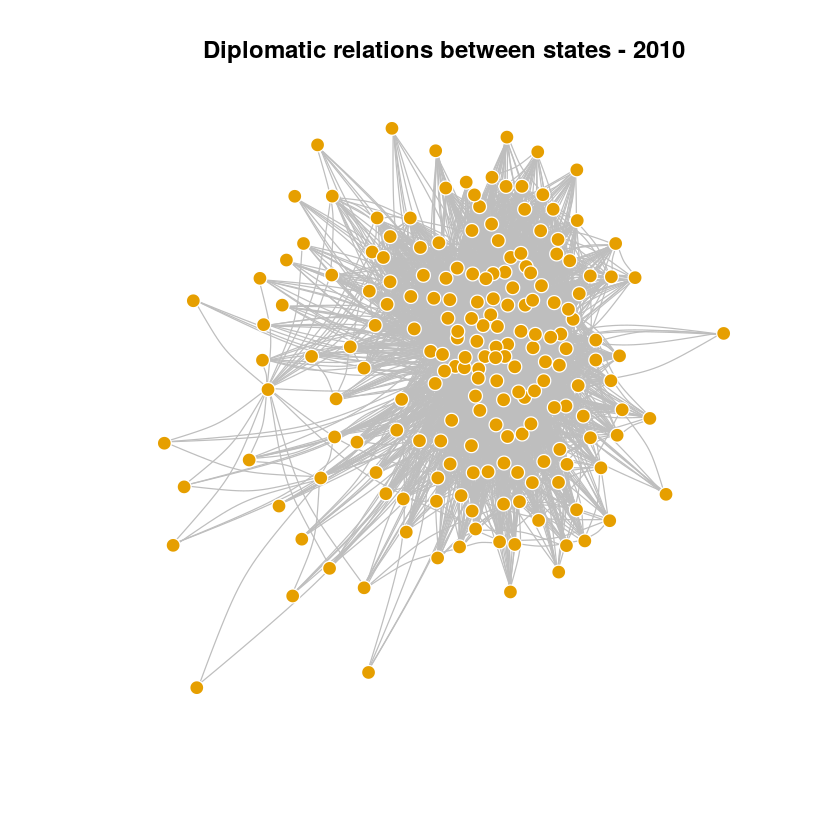

In [6]:
#############################################################################
##################################Visualising################################
#############################################################################

plot.igraph(g,
            layout=layout.fruchterman.reingold,
            vertex.label = NA,
            vertex.size = 5,
            edge.size = 0.01,
            edge.color="grey",
            edge.curved= .2,
            vertex.frame.color="#ffffff",
            main='Diplomatic relations between states - 2010')


[1] 6

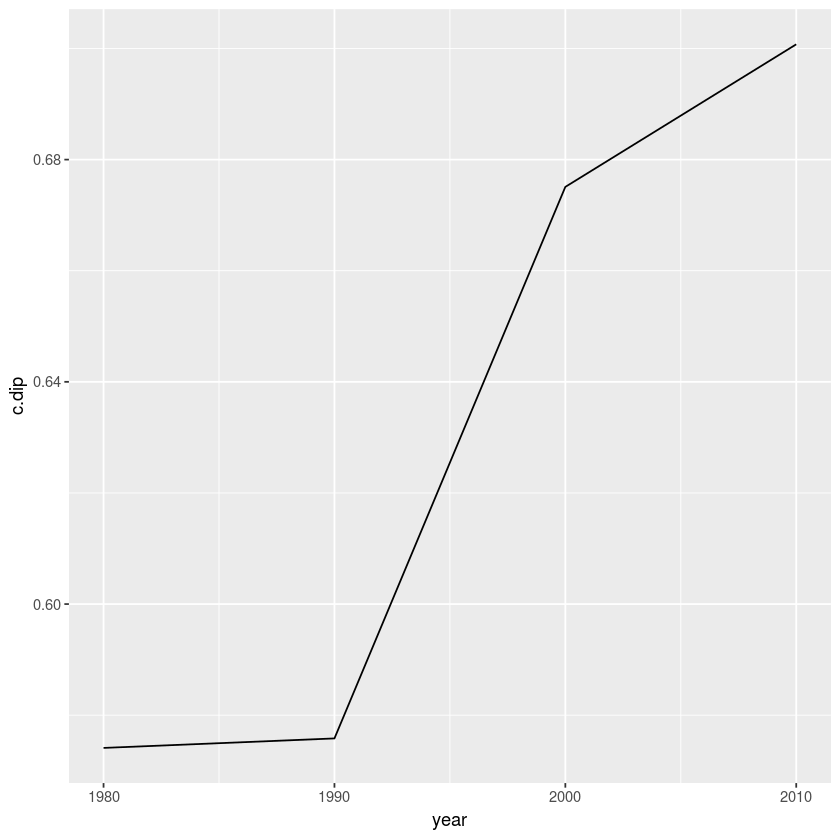

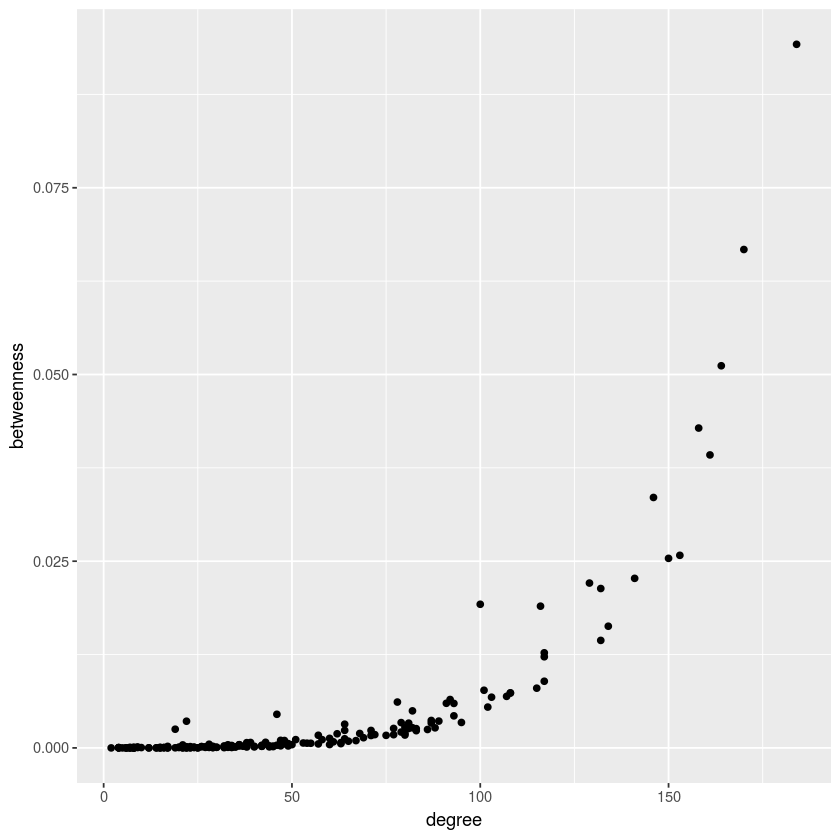

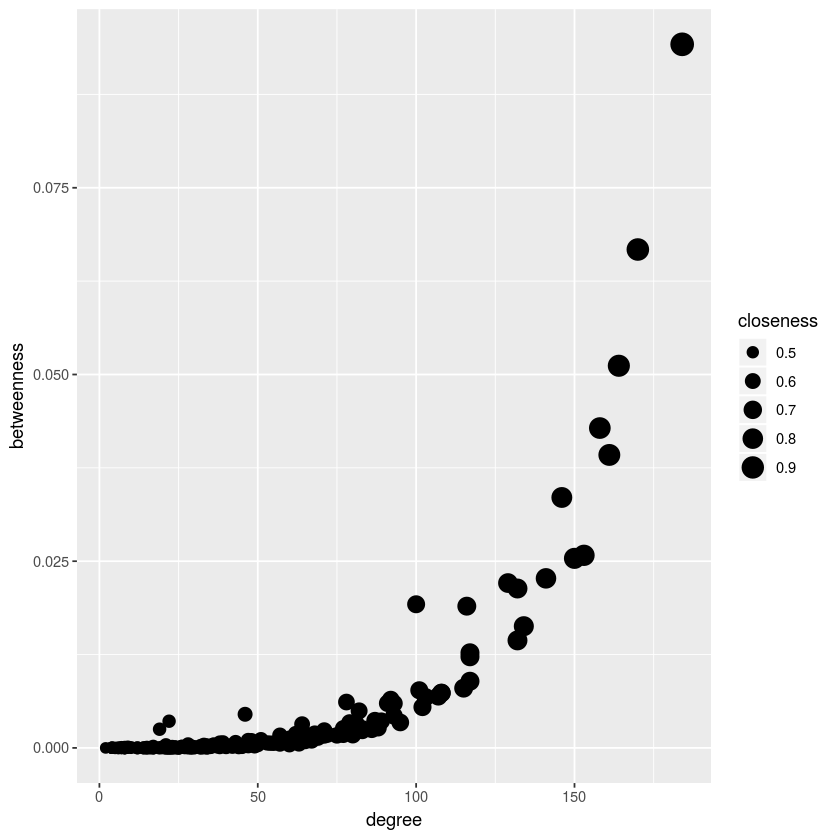

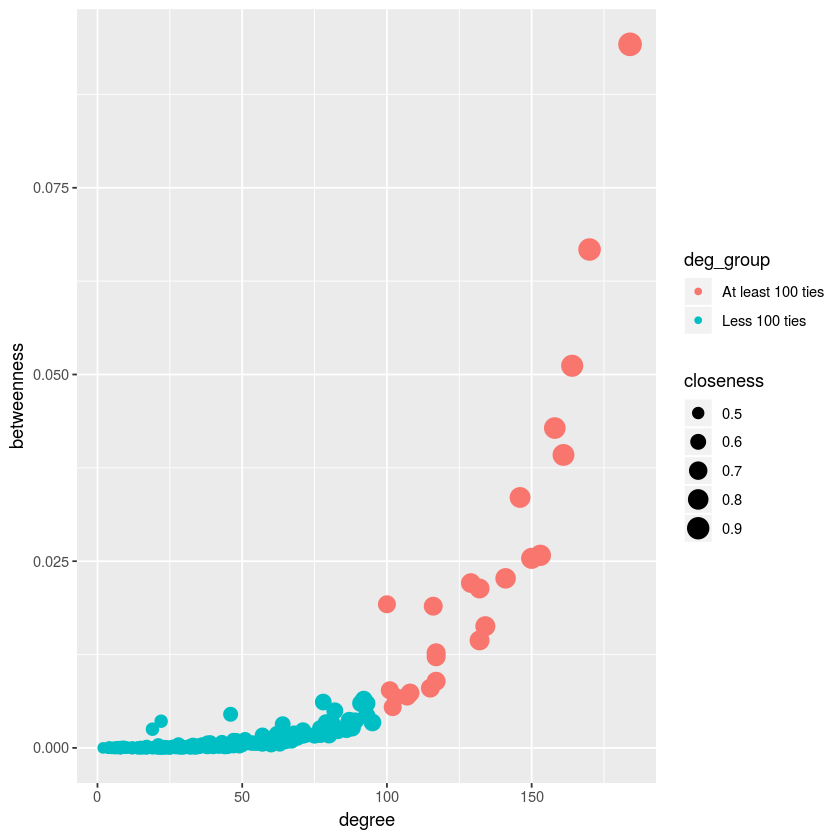

In [7]:
#############################################################################
###################################Functions################################
#############################################################################

### defining a function 
add <- function(a,b){
  c <- a+b
  c
}

### testing the function
add(1,5)


### create a function that returns only the degree centralization for a given data frame a network 
cent <- function(data, year){
  data1 <- data %>% # selecting th data set
    filter(year > 0) %>% # keeping only the connections in 2010
    select(abbrev1, abbrev2) # selecting the variables
  #Turning into a graph object
  graph <- graph.data.frame(data1, directed = F) # storing the graph as "undirected" for the sake of simplicity
  ## Even though the graph object is sstored as "undirected", some edges may appear twice (in cases where reciprocal ties are directional)
  graph <- simplify(graph, remove.multiple = T, remove.loops = T) #use this function to remove multiples or self-ties 
  ## outputing normalized degree centralization
  deg1<- centr_degree(graph, normalized = T)
  deg1$centralization
}


### computing degree centralization for the selected years 
dip80 <- cent(df, df$dipcon1980)
dip90 <- cent(df, df$dipcon1990)
dip00 <- cent(df, df$dipcon2000)
dip10 <- cent(df, df$dipcon2010)

### creating a dataframe with years and degree centralization 
c.dip <- c(dip80, dip90, dip00, dip10)
year <- c(1980, 1990, 2000, 2010)
c.df <- data.frame(year, c.dip)

### Vizualising
## line plot
ggplot(c.df, aes(year, c.dip)) +
  geom_line()


### creating a dataframe with centrality scores for each country
df.g <- data.frame(country = V(g)$name,
                   degree = degree(g, mode = 'all'),
                   betweenness = betweenness(g, directed = F, normalized = T),
                   closeness = closeness(g, mode = "all", normalized = T))


### creating a scatterplot to explore the relationship between degree centrality and betweeness centrality
ggplot(df.g, aes(degree, betweenness)) +
  geom_point()

### the point size will now reflect closeness
ggplot(df.g, aes(degree, betweenness, size = closeness)) +
  geom_point()


### colour will reflect the ordinal variable (wether the countries have less than- or at least 100 contacts)
### creating a variable indicating wether the degree is below or above 100
df.g$deg_group[df.g$degree <100] <- "Less 100 ties"  
df.g$deg_group[df.g$degree >= 100] <- "At least 100 ties"


ggplot(df.g, aes(degree, betweenness, size = closeness,
                 colour = deg_group)) +
  geom_point() 

### and now with Tufte's theme

# ggplot(df.g, aes(degree, betweenness, size = closeness,
#                  colour = deg_group)) +
#   geom_point() + theme_tufte()

### exporting the  graph file in the working directory 
ggsave("world_network.png", plot = last_plot(),
       width = 25, height = 10, units = "cm",
dpi = 600)

In [8]:
### exporting the dataframe as csv
write.csv(df.g, "diplodata.txt")